### **MODULE 4 :TRADE CALL PREDICTION USING CLASSIFICATION**

***4.1***

*Imported the csv file of the stock which contained the Bollinger columns as well.*

In [ ]:
# Import pandas library
import pandas as pd
import numpy as np

df = pd.read_csv('/content/week3 (1).csv')
df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Day_Perc_Change,Trend,14 Day MA,14 Day STD,Upper Band,Lower Band
0,HINDUNILVR,EQ,15-May-2017,980.20,981.30,988.85,974.55,982.50,983.25,980.72,734446,7.202888e+08,32976,420159,57.21,5,2017,0.000000,Slight or No change,NaN,NaN,NaN,NaN
1,HINDUNILVR,EQ,16-May-2017,983.25,983.00,1002.50,982.05,999.50,1000.40,994.00,1503815,1.494798e+09,39717,669576,44.53,5,2017,1.744216,positive,NaN,NaN,NaN,NaN
2,HINDUNILVR,EQ,17-May-2017,1000.40,1004.00,1012.00,991.10,1009.00,1009.40,1003.84,1999387,2.007056e+09,63210,996054,49.82,5,2017,0.899640,Slight positive,NaN,NaN,NaN,NaN
3,HINDUNILVR,EQ,18-May-2017,1009.40,1008.00,1009.00,983.00,987.50,990.25,997.56,2690943,2.684374e+09,78098,983594,36.55,5,2017,-1.897167,Other,NaN,NaN,NaN,NaN
4,HINDUNILVR,EQ,19-May-2017,990.25,1000.00,1022.75,1000.00,1004.10,1008.00,1009.97,3059815,3.090316e+09,57429,1523108,49.78,5,2017,1.792477,positive,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,HINDUNILVR,EQ,07-May-2019,1668.90,1678.80,1710.90,1672.50,1697.50,1697.50,1700.33,2212617,3.762183e+09,83971,1248858,56.44,5,2019,1.713704,positive,1727.684615,26.171966,1780.028548,1675.340683
490,HINDUNILVR,EQ,08-May-2019,1697.50,1697.50,1697.50,1675.00,1690.15,1688.70,1686.13,1243338,2.096428e+09,105328,849935,68.36,5,2019,-0.518409,Other,1725.119231,28.316894,1781.753018,1668.485443
491,HINDUNILVR,EQ,09-May-2019,1688.70,1680.10,1713.00,1677.00,1702.45,1703.75,1695.24,1204995,2.042757e+09,96629,821111,68.14,5,2019,0.891218,Slight positive,1722.442308,28.585047,1779.612403,1665.272213
492,HINDUNILVR,EQ,10-May-2019,1703.75,1708.95,1709.00,1678.50,1686.00,1687.45,1694.39,1000696,1.695567e+09,98364,581135,58.07,5,2019,-0.956713,Other,1718.407692,29.599175,1777.606043,1659.209341


In [ ]:
df["14 Day MA"] = df["14 Day MA"].fillna(0)
df["14 Day STD"] = df["14 Day STD"].fillna(0)
df["Upper Band"] = df["Upper Band"].fillna(0)
df["Lower Band"] = df["Lower Band"].fillna(0)
df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Day_Perc_Change,Trend,14 Day MA,14 Day STD,Upper Band,Lower Band
0,HINDUNILVR,EQ,15-May-2017,980.20,981.30,988.85,974.55,982.50,983.25,980.72,734446,7.202888e+08,32976,420159,57.21,5,2017,0.000000,Slight or No change,0.000000,0.000000,0.000000,0.000000
1,HINDUNILVR,EQ,16-May-2017,983.25,983.00,1002.50,982.05,999.50,1000.40,994.00,1503815,1.494798e+09,39717,669576,44.53,5,2017,1.744216,positive,0.000000,0.000000,0.000000,0.000000
2,HINDUNILVR,EQ,17-May-2017,1000.40,1004.00,1012.00,991.10,1009.00,1009.40,1003.84,1999387,2.007056e+09,63210,996054,49.82,5,2017,0.899640,Slight positive,0.000000,0.000000,0.000000,0.000000
3,HINDUNILVR,EQ,18-May-2017,1009.40,1008.00,1009.00,983.00,987.50,990.25,997.56,2690943,2.684374e+09,78098,983594,36.55,5,2017,-1.897167,Other,0.000000,0.000000,0.000000,0.000000
4,HINDUNILVR,EQ,19-May-2017,990.25,1000.00,1022.75,1000.00,1004.10,1008.00,1009.97,3059815,3.090316e+09,57429,1523108,49.78,5,2017,1.792477,positive,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,HINDUNILVR,EQ,07-May-2019,1668.90,1678.80,1710.90,1672.50,1697.50,1697.50,1700.33,2212617,3.762183e+09,83971,1248858,56.44,5,2019,1.713704,positive,1727.684615,26.171966,1780.028548,1675.340683
490,HINDUNILVR,EQ,08-May-2019,1697.50,1697.50,1697.50,1675.00,1690.15,1688.70,1686.13,1243338,2.096428e+09,105328,849935,68.36,5,2019,-0.518409,Other,1725.119231,28.316894,1781.753018,1668.485443
491,HINDUNILVR,EQ,09-May-2019,1688.70,1680.10,1713.00,1677.00,1702.45,1703.75,1695.24,1204995,2.042757e+09,96629,821111,68.14,5,2019,0.891218,Slight positive,1722.442308,28.585047,1779.612403,1665.272213
492,HINDUNILVR,EQ,10-May-2019,1703.75,1708.95,1709.00,1678.50,1686.00,1687.45,1694.39,1000696,1.695567e+09,98364,581135,58.07,5,2019,-0.956713,Other,1718.407692,29.599175,1777.606043,1659.209341


*Creating a new column 'Call'*

In [ ]:
#Buy' if the stock price is below the lower Bollinger band
df.loc[df['Close Price']<df['Lower Band'],'Call'] = 'Buy'

#'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band
df.loc[df['Close Price'].between(df['Lower Band'],df['14 Day MA']),'Call'] = 'Hold Buy/Liquidate Short'

#'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band
df.loc[df['Close Price'].between(df['14 Day MA'],df['Upper Band']),'Call'] = 'Hold Short/Liquidate Buy'

#'Short' if the stock price is above the upper Bollinger band
df.loc[df['Close Price']>=df['Upper Band'],'Call'] = 'Short'

df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Day_Perc_Change,Trend,14 Day MA,14 Day STD,Upper Band,Lower Band,Call
0,HINDUNILVR,EQ,15-May-2017,980.20,981.30,988.85,974.55,982.50,983.25,980.72,734446,7.202888e+08,32976,420159,57.21,5,2017,0.000000,Slight or No change,0.000000,0.000000,0.000000,0.000000,Short
1,HINDUNILVR,EQ,16-May-2017,983.25,983.00,1002.50,982.05,999.50,1000.40,994.00,1503815,1.494798e+09,39717,669576,44.53,5,2017,1.744216,positive,0.000000,0.000000,0.000000,0.000000,Short
2,HINDUNILVR,EQ,17-May-2017,1000.40,1004.00,1012.00,991.10,1009.00,1009.40,1003.84,1999387,2.007056e+09,63210,996054,49.82,5,2017,0.899640,Slight positive,0.000000,0.000000,0.000000,0.000000,Short
3,HINDUNILVR,EQ,18-May-2017,1009.40,1008.00,1009.00,983.00,987.50,990.25,997.56,2690943,2.684374e+09,78098,983594,36.55,5,2017,-1.897167,Other,0.000000,0.000000,0.000000,0.000000,Short
4,HINDUNILVR,EQ,19-May-2017,990.25,1000.00,1022.75,1000.00,1004.10,1008.00,1009.97,3059815,3.090316e+09,57429,1523108,49.78,5,2017,1.792477,positive,0.000000,0.000000,0.000000,0.000000,Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,HINDUNILVR,EQ,07-May-2019,1668.90,1678.80,1710.90,1672.50,1697.50,1697.50,1700.33,2212617,3.762183e+09,83971,1248858,56.44,5,2019,1.713704,positive,1727.684615,26.171966,1780.028548,1675.340683,Hold Buy/Liquidate Short
490,HINDUNILVR,EQ,08-May-2019,1697.50,1697.50,1697.50,1675.00,1690.15,1688.70,1686.13,1243338,2.096428e+09,105328,849935,68.36,5,2019,-0.518409,Other,1725.119231,28.316894,1781.753018,1668.485443,Hold Buy/Liquidate Short
491,HINDUNILVR,EQ,09-May-2019,1688.70,1680.10,1713.00,1677.00,1702.45,1703.75,1695.24,1204995,2.042757e+09,96629,821111,68.14,5,2019,0.891218,Slight positive,1722.442308,28.585047,1779.612403,1665.272213,Hold Buy/Liquidate Short
492,HINDUNILVR,EQ,10-May-2019,1703.75,1708.95,1709.00,1678.50,1686.00,1687.45,1694.39,1000696,1.695567e+09,98364,581135,58.07,5,2019,-0.956713,Other,1718.407692,29.599175,1777.606043,1659.209341,Hold Buy/Liquidate Short


In [ ]:
#Train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. 
#Check the accuracy on a test set.
#Try each one model and compare the accuracy for each.

1.   USING BAYES CLASSIFIER :



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics

x=df[["Close Price","Lower Band","14 Day MA","Upper Band"]]
y=df['Call']

x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# Train classifier
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = gnb.predict(x_test)
print("PREDICTION OF NAIVES BAYES CLASSIFIER FOR LAST 10 ROWS IS :")
print(" ")
df_new=pd.DataFrame()
df_new['Predicted'] = y_pred
df_new['Actual']=y
df_new.tail(10)

PREDICTION OF NAIVES BAYES CLASSIFIER FOR LAST 10 ROWS IS :
 


,Predicted,Actual
114,Hold Buy/Liquidate Short,Hold Short/Liquidate Buy
115,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
116,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
117,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
118,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
119,Hold Short/Liquidate Buy,Hold Buy/Liquidate Short
120,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
121,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
122,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
123,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy


In [ ]:
accuracy1=accuracy_score(y_test,y_pred)
print("ACCURACY OF NAIVES BAYES CLASSIFIER IS :",end=" ")
print(accuracy1)

ACCURACY OF NAIVES BAYES CLASSIFIER IS : 0.532258064516129


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  3  0  0]
 [ 0 23 15  0]
 [ 0 34 39  0]
 [ 0  1  5  4]]
                          precision    recall  f1-score   support

                     Buy       0.00      0.00      0.00         3
Hold Buy/Liquidate Short       0.38      0.61      0.46        38
Hold Short/Liquidate Buy       0.66      0.53      0.59        73
                   Short       1.00      0.40      0.57        10

                accuracy                           0.53       124
               macro avg       0.51      0.38      0.41       124
            weighted avg       0.59      0.53      0.54       124



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2.   USING DECISION TREES

In [ ]:
from sklearn.tree import DecisionTreeClassifier

x=df[["Close Price","Lower Band","14 Day MA","Upper Band"]]
y=df['Call']

x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = classifier.predict(x_test)
df_new['Predicted'] = y_pred
df_new['Actual']=y
df_new.head(10)

,Predicted,Actual
0,Hold Short/Liquidate Buy,Short
1,Hold Short/Liquidate Buy,Short
2,Hold Short/Liquidate Buy,Short
3,Hold Buy/Liquidate Short,Short
4,Hold Buy/Liquidate Short,Short
5,Hold Buy/Liquidate Short,Short
6,Hold Short/Liquidate Buy,Short
7,Hold Short/Liquidate Buy,Short
8,Hold Short/Liquidate Buy,Short
9,Short,Short


In [ ]:
accuracy2=accuracy_score(y_test,y_pred)
print("ACCURACY OF DECISION TREE CLASSIFIER  IS :",end=" ")
print(accuracy2)

ACCURACY OF DECISION TREE CLASSIFIER  IS : 0.7983870967741935


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 2  1  0  0]
 [ 2 32  3  1]
 [ 0  5 60  8]
 [ 0  0  5  5]]
                          precision    recall  f1-score   support

                     Buy       0.50      0.67      0.57         3
Hold Buy/Liquidate Short       0.84      0.84      0.84        38
Hold Short/Liquidate Buy       0.88      0.82      0.85        73
                   Short       0.36      0.50      0.42        10

                accuracy                           0.80       124
               macro avg       0.65      0.71      0.67       124
            weighted avg       0.82      0.80      0.81       124



3.   USING KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

x=df[["Close Price","Lower Band","14 Day MA","Upper Band"]]
y=df['Call']

x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(x_test)
df_new['Predicted'] = y_pred
df_new['Actual']=y
df_new.head(10)

,Predicted,Actual
0,Hold Short/Liquidate Buy,Short
1,Hold Short/Liquidate Buy,Short
2,Hold Short/Liquidate Buy,Short
3,Hold Short/Liquidate Buy,Short
4,Hold Buy/Liquidate Short,Short
5,Hold Buy/Liquidate Short,Short
6,Hold Short/Liquidate Buy,Short
7,Hold Short/Liquidate Buy,Short
8,Hold Short/Liquidate Buy,Short
9,Short,Short


In [ ]:
accuracy3=accuracy_score(y_test,y_pred)
print("ACCURACY OF KNN CLASSIFIER IS :",end=" ")
print(accuracy3)

ACCURACY OF KNN CLASSIFIER IS : 0.8548387096774194


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  3  0  0]
 [ 0 36  2  0]
 [ 0  7 66  0]
 [ 0  0  6  4]]
                          precision    recall  f1-score   support

                     Buy       0.00      0.00      0.00         3
Hold Buy/Liquidate Short       0.78      0.95      0.86        38
Hold Short/Liquidate Buy       0.89      0.90      0.90        73
                   Short       1.00      0.40      0.57        10

                accuracy                           0.85       124
               macro avg       0.67      0.56      0.58       124
            weighted avg       0.85      0.85      0.84       124



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4.   USING RANDOM FOREST ALGORITHM


In [ ]:
from sklearn.ensemble import RandomForestClassifier

x=df[["Close Price","Lower Band","14 Day MA","Upper Band"]]
y=df['Call']

x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
regressor = RandomForestClassifier(n_estimators=20)
regressor.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(x_test)
df_new['Predicted'] = y_pred
df_new['Actual']=y
df_new.head(10)

,Predicted,Actual
0,Hold Short/Liquidate Buy,Short
1,Hold Short/Liquidate Buy,Short
2,Hold Short/Liquidate Buy,Short
3,Hold Buy/Liquidate Short,Short
4,Hold Buy/Liquidate Short,Short
5,Hold Buy/Liquidate Short,Short
6,Hold Short/Liquidate Buy,Short
7,Hold Short/Liquidate Buy,Short
8,Hold Short/Liquidate Buy,Short
9,Short,Short


In [ ]:
accuracy4=accuracy_score(y_test,y_pred)
print("ACCURACY OF RANDOM FOREST IS :",end=" ")
print(accuracy4)

ACCURACY OF RANDOM FOREST IS : 0.8548387096774194


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  3  0  0]
 [ 1 35  2  0]
 [ 0  5 67  1]
 [ 0  0  6  4]]
                          precision    recall  f1-score   support

                     Buy       0.00      0.00      0.00         3
Hold Buy/Liquidate Short       0.81      0.92      0.86        38
Hold Short/Liquidate Buy       0.89      0.92      0.91        73
                   Short       0.80      0.40      0.53        10

                accuracy                           0.85       124
               macro avg       0.63      0.56      0.58       124
            weighted avg       0.84      0.85      0.84       124



### **INFERENCE : [HUL]**
*   ACCURACY OF NAIVES BAYES CLASSIFIER IS : **0.53**
*   ACCURACY OF DECISION TREE CLASSIFIER  IS : **0.73**
*   ACCURACY OF RANDOM FOREST ALGORITHM IS : **0.83**
*   ACCURACY OF K-NEAREST NEIGHBOURS CLASSIFIER IS : **0.85**
* **SO THE BEST ALGORITHM IS : KNN** 


*Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.*

In [ ]:
df1 = pd.read_csv('/content/JUBLFOOD.csv')
df1

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,JUBLFOOD,EQ,15-May-17,986.35,991.85,1031.00,983.55,1029.60,1025.45,1009.72,576466,5.820685e+08,19888,115368,20.01
1,JUBLFOOD,EQ,16-May-17,1025.45,1028.50,1054.85,1028.50,1052.00,1050.65,1042.26,487510,5.081107e+08,15487,84859,17.41
2,JUBLFOOD,EQ,17-May-17,1050.65,1044.00,1058.75,1024.20,1047.00,1049.05,1039.93,393751,4.094726e+08,15205,61936,15.73
3,JUBLFOOD,EQ,18-May-17,1049.05,1039.70,1049.15,1012.20,1014.10,1019.35,1033.80,381432,3.943245e+08,10345,40599,10.64
4,JUBLFOOD,EQ,19-May-17,1019.35,1022.00,1042.20,1011.00,1012.55,1018.10,1025.24,287852,2.951171e+08,9834,60049,20.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,JUBLFOOD,EQ,7-May-19,1299.85,1305.00,1320.00,1277.40,1278.00,1282.25,1300.36,1309419,1.702720e+09,35689,247667,18.91
491,JUBLFOOD,EQ,8-May-19,1282.25,1272.00,1276.55,1241.85,1266.40,1262.45,1263.53,1039517,1.313462e+09,34996,123192,11.85
492,JUBLFOOD,EQ,9-May-19,1262.45,1266.00,1278.00,1253.25,1274.75,1268.80,1266.63,646016,8.182635e+08,22188,64429,9.97
493,JUBLFOOD,EQ,10-May-19,1268.80,1278.80,1294.80,1258.80,1265.45,1264.50,1278.45,892408,1.140898e+09,25374,110213,12.35


In [ ]:
#The 14 day rolling mean of the closing price (we call it the average)
df1['14 Day MA'] = df1['Close Price'].rolling(window=13).mean()

df1['14 Day STD'] = df1['Close Price'].rolling(window=13).std()

#Upper band which is the rolling mean + 2 standard deviations away from the average
df1['Upper Band'] = df1['14 Day MA'] + (df1['14 Day STD'] * 2)
#Lower band which is the rolling mean - 2 standard deviations away from the average.
df1['Lower Band'] = df1['14 Day MA'] - (df1['14 Day STD'] * 2)
df1.head(5)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,14 Day STD,Upper Band,Lower Band
0,JUBLFOOD,EQ,15-May-17,986.35,991.85,1031.00,983.55,1029.60,1025.45,1009.72,576466,582068509.3,19888,115368,20.01,NaN,NaN,NaN,NaN
1,JUBLFOOD,EQ,16-May-17,1025.45,1028.50,1054.85,1028.50,1052.00,1050.65,1042.26,487510,508110696.2,15487,84859,17.41,NaN,NaN,NaN,NaN
2,JUBLFOOD,EQ,17-May-17,1050.65,1044.00,1058.75,1024.20,1047.00,1049.05,1039.93,393751,409472571.4,15205,61936,15.73,NaN,NaN,NaN,NaN
3,JUBLFOOD,EQ,18-May-17,1049.05,1039.70,1049.15,1012.20,1014.10,1019.35,1033.80,381432,394324549.9,10345,40599,10.64,NaN,NaN,NaN,NaN
4,JUBLFOOD,EQ,19-May-17,1019.35,1022.00,1042.20,1011.00,1012.55,1018.10,1025.24,287852,295117054.1,9834,60049,20.86,NaN,NaN,NaN,NaN


In [ ]:
df1["14 Day MA"] = df1["14 Day MA"].fillna(0)
df1["14 Day STD"] = df1["14 Day STD"].fillna(0)
df1["Upper Band"] = df1["Upper Band"].fillna(0)
df1["Lower Band"] = df1["Lower Band"].fillna(0)
df1

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,14 Day STD,Upper Band,Lower Band
0,JUBLFOOD,EQ,15-May-17,986.35,991.85,1031.00,983.55,1029.60,1025.45,1009.72,576466,5.820685e+08,19888,115368,20.01,0.000000,0.000000,0.000000,0.000000
1,JUBLFOOD,EQ,16-May-17,1025.45,1028.50,1054.85,1028.50,1052.00,1050.65,1042.26,487510,5.081107e+08,15487,84859,17.41,0.000000,0.000000,0.000000,0.000000
2,JUBLFOOD,EQ,17-May-17,1050.65,1044.00,1058.75,1024.20,1047.00,1049.05,1039.93,393751,4.094726e+08,15205,61936,15.73,0.000000,0.000000,0.000000,0.000000
3,JUBLFOOD,EQ,18-May-17,1049.05,1039.70,1049.15,1012.20,1014.10,1019.35,1033.80,381432,3.943245e+08,10345,40599,10.64,0.000000,0.000000,0.000000,0.000000
4,JUBLFOOD,EQ,19-May-17,1019.35,1022.00,1042.20,1011.00,1012.55,1018.10,1025.24,287852,2.951171e+08,9834,60049,20.86,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,JUBLFOOD,EQ,7-May-19,1299.85,1305.00,1320.00,1277.40,1278.00,1282.25,1300.36,1309419,1.702720e+09,35689,247667,18.91,1331.876923,26.490939,1384.858801,1278.895045
491,JUBLFOOD,EQ,8-May-19,1282.25,1272.00,1276.55,1241.85,1266.40,1262.45,1263.53,1039517,1.313462e+09,34996,123192,11.85,1323.573077,30.084476,1383.742028,1263.404126
492,JUBLFOOD,EQ,9-May-19,1262.45,1266.00,1278.00,1253.25,1274.75,1268.80,1266.63,646016,8.182635e+08,22188,64429,9.97,1314.930769,28.247319,1371.425408,1258.436130
493,JUBLFOOD,EQ,10-May-19,1268.80,1278.80,1294.80,1258.80,1265.45,1264.50,1278.45,892408,1.140898e+09,25374,110213,12.35,1308.726923,29.867280,1368.461483,1248.992363


In [ ]:
#Buy' if the stock price is below the lower Bollinger band
df1.loc[df1['Close Price']<df1['Lower Band'],'Call'] = 'Buy'

#'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band
df1.loc[df1['Close Price'].between(df1['Lower Band'],df1['14 Day MA']),'Call'] = 'Hold Buy/Liquidate Short'

#'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band
df1.loc[df1['Close Price'].between(df1['14 Day MA'],df1['Upper Band']),'Call'] = 'Hold Short/Liquidate Buy'

#'Short' if the stock price is above the upper Bollinger band
df1.loc[df1['Close Price']>=df1['Upper Band'],'Call'] = 'Short'

df1

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,14 Day STD,Upper Band,Lower Band,Call
0,JUBLFOOD,EQ,15-May-17,986.35,991.85,1031.00,983.55,1029.60,1025.45,1009.72,576466,5.820685e+08,19888,115368,20.01,0.000000,0.000000,0.000000,0.000000,Short
1,JUBLFOOD,EQ,16-May-17,1025.45,1028.50,1054.85,1028.50,1052.00,1050.65,1042.26,487510,5.081107e+08,15487,84859,17.41,0.000000,0.000000,0.000000,0.000000,Short
2,JUBLFOOD,EQ,17-May-17,1050.65,1044.00,1058.75,1024.20,1047.00,1049.05,1039.93,393751,4.094726e+08,15205,61936,15.73,0.000000,0.000000,0.000000,0.000000,Short
3,JUBLFOOD,EQ,18-May-17,1049.05,1039.70,1049.15,1012.20,1014.10,1019.35,1033.80,381432,3.943245e+08,10345,40599,10.64,0.000000,0.000000,0.000000,0.000000,Short
4,JUBLFOOD,EQ,19-May-17,1019.35,1022.00,1042.20,1011.00,1012.55,1018.10,1025.24,287852,2.951171e+08,9834,60049,20.86,0.000000,0.000000,0.000000,0.000000,Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,JUBLFOOD,EQ,7-May-19,1299.85,1305.00,1320.00,1277.40,1278.00,1282.25,1300.36,1309419,1.702720e+09,35689,247667,18.91,1331.876923,26.490939,1384.858801,1278.895045,Hold Buy/Liquidate Short
491,JUBLFOOD,EQ,8-May-19,1282.25,1272.00,1276.55,1241.85,1266.40,1262.45,1263.53,1039517,1.313462e+09,34996,123192,11.85,1323.573077,30.084476,1383.742028,1263.404126,Buy
492,JUBLFOOD,EQ,9-May-19,1262.45,1266.00,1278.00,1253.25,1274.75,1268.80,1266.63,646016,8.182635e+08,22188,64429,9.97,1314.930769,28.247319,1371.425408,1258.436130,Hold Buy/Liquidate Short
493,JUBLFOOD,EQ,10-May-19,1268.80,1278.80,1294.80,1258.80,1265.45,1264.50,1278.45,892408,1.140898e+09,25374,110213,12.35,1308.726923,29.867280,1368.461483,1248.992363,Hold Buy/Liquidate Short


*1. GAUSSIAN BAYES CLASSIFIER*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics

x=df1[["Close Price","Lower Band","14 Day MA","Upper Band"]]
y=df1['Call']

x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# Train classifier
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = gnb.predict(x_test)
print("PREDICTION OF NAIVES BAYES CLASSIFIER FOR LAST 10 ROWS IS :")
print(" ")
df_new1=pd.DataFrame()
df_new1['Predicted'] = y_pred
df_new1['Actual']=y
df_new1.tail(10)

PREDICTION OF NAIVES BAYES CLASSIFIER FOR LAST 10 ROWS IS :
 


,Predicted,Actual
114,Hold Buy/Liquidate Short,Hold Short/Liquidate Buy
115,Hold Buy/Liquidate Short,Hold Short/Liquidate Buy
116,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
117,Hold Buy/Liquidate Short,Hold Short/Liquidate Buy
118,Hold Buy/Liquidate Short,Hold Short/Liquidate Buy
119,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
120,Hold Buy/Liquidate Short,Hold Short/Liquidate Buy
121,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
122,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
123,Hold Buy/Liquidate Short,Short


In [ ]:
accuracy1=accuracy_score(y_test,y_pred)
print("ACCURACY OF NAIVES BAYES CLASSIFIER IS :",end=" ")
print(accuracy1)

ACCURACY OF NAIVES BAYES CLASSIFIER IS : 0.5725806451612904


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  2  0  0]
 [ 0 38  7  0]
 [ 0 39 29  0]
 [ 0  1  4  4]]
                          precision    recall  f1-score   support

                     Buy       0.00      0.00      0.00         2
Hold Buy/Liquidate Short       0.47      0.84      0.61        45
Hold Short/Liquidate Buy       0.72      0.43      0.54        68
                   Short       1.00      0.44      0.62         9

                accuracy                           0.57       124
               macro avg       0.55      0.43      0.44       124
            weighted avg       0.64      0.57      0.56       124



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2.Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

x=df1[["Close Price","Lower Band","14 Day MA","Upper Band"]]
y=df1['Call']

x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

classifier1 = DecisionTreeClassifier()
classifier1.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = classifier.predict(x_test)
df_new1['Predicted'] = y_pred
df_new1['Actual']=y
df_new1.head(10)

,Predicted,Actual
0,Hold Short/Liquidate Buy,Short
1,Hold Buy/Liquidate Short,Short
2,Hold Short/Liquidate Buy,Short
3,Hold Short/Liquidate Buy,Short
4,Hold Short/Liquidate Buy,Short
5,Hold Short/Liquidate Buy,Short
6,Hold Short/Liquidate Buy,Short
7,Hold Short/Liquidate Buy,Short
8,Hold Short/Liquidate Buy,Short
9,Short,Short


In [ ]:
accuracy6=accuracy_score(y_test,y_pred)
print("ACCURACY OF DECISION TREE CLASSIFIER  IS :",end=" ")
print(accuracy6)

ACCURACY OF DECISION TREE CLASSIFIER  IS : 0.7661290322580645


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  2  0  0]
 [ 0 24 21  0]
 [ 0  1 67  0]
 [ 0  0  5  4]]
                          precision    recall  f1-score   support

                     Buy       0.00      0.00      0.00         2
Hold Buy/Liquidate Short       0.89      0.53      0.67        45
Hold Short/Liquidate Buy       0.72      0.99      0.83        68
                   Short       1.00      0.44      0.62         9

                accuracy                           0.77       124
               macro avg       0.65      0.49      0.53       124
            weighted avg       0.79      0.77      0.74       124



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3.K Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

x=df1[["Close Price","Lower Band","14 Day MA","Upper Band"]]
y=df1['Call']

x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

classifier2 = KNeighborsClassifier(n_neighbors=5)
classifier2.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier2.predict(x_test)
df_new1['Predicted'] = y_pred
df_new1['Actual']=y
df_new1.head(10)

,Predicted,Actual
0,Hold Short/Liquidate Buy,Short
1,Hold Buy/Liquidate Short,Short
2,Hold Short/Liquidate Buy,Short
3,Hold Short/Liquidate Buy,Short
4,Hold Buy/Liquidate Short,Short
5,Hold Short/Liquidate Buy,Short
6,Hold Short/Liquidate Buy,Short
7,Hold Short/Liquidate Buy,Short
8,Hold Short/Liquidate Buy,Short
9,Short,Short


In [ ]:
accuracy7=accuracy_score(y_test,y_pred)
print("ACCURACY OF KNN  IS :",end=" ")
print(accuracy7)

ACCURACY OF KNN  IS : 0.8387096774193549


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  2  0  0]
 [ 1 41  3  0]
 [ 0  8 59  1]
 [ 0  0  5  4]]
                          precision    recall  f1-score   support

                     Buy       0.00      0.00      0.00         2
Hold Buy/Liquidate Short       0.80      0.91      0.85        45
Hold Short/Liquidate Buy       0.88      0.87      0.87        68
                   Short       0.80      0.44      0.57         9

                accuracy                           0.84       124
               macro avg       0.62      0.56      0.57       124
            weighted avg       0.83      0.84      0.83       124



*4.Random Forest Classifier*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

x=df1[["Close Price","Lower Band","14 Day MA","Upper Band"]]
y=df1['Call']

x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
regressor1 = RandomForestClassifier(n_estimators=20)
regressor1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = regressor1.predict(x_test)
df_new1['Predicted'] = y_pred
df_new1['Actual']=y


df_new1

,Predicted,Actual
0,Hold Short/Liquidate Buy,Short
1,Hold Buy/Liquidate Short,Short
2,Hold Short/Liquidate Buy,Short
3,Hold Short/Liquidate Buy,Short
4,Hold Buy/Liquidate Short,Short
...,...,...
119,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
120,Hold Buy/Liquidate Short,Hold Short/Liquidate Buy
121,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
122,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy


In [ ]:
accuracy8=accuracy_score(y_test,y_pred)
print("ACCURACY OF RANDOM FOREST  IS :",end=" ")
print(accuracy8)

ACCURACY OF RANDOM FOREST  IS : 0.8306451612903226


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  2  0  0]
 [ 0 38  7  0]
 [ 0  5 60  3]
 [ 0  0  4  5]]
                          precision    recall  f1-score   support

                     Buy       0.00      0.00      0.00         2
Hold Buy/Liquidate Short       0.84      0.84      0.84        45
Hold Short/Liquidate Buy       0.85      0.88      0.86        68
                   Short       0.62      0.56      0.59         9

                accuracy                           0.83       124
               macro avg       0.58      0.57      0.57       124
            weighted avg       0.82      0.83      0.82       124



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **INFERENCE : [JUBILIANT FOOD]**
*   ACCURACY OF NAIVES BAYES CLASSIFIER IS : **0.57**
*   ACCURACY OF DECISION TREE CLASSIFIER  IS : **0.77**
*   ACCURACY OF RANDOM FOREST CLASSIFIER IS : **0.85**
*   ACCURACY OF K-NEAREST NEIGHBOURS CLASSIFIER IS : **0.84**
* **SO THE BEST ALGORITHM IS : RANDOM FOREST CLASSIFIER** 


***4.2***

In [ ]:
df1.shape

(495, 20)

In [ ]:
#% change between Open and Close price for the day
df1['oc_perc']=(df1['Close Price']/df1['Open Price']-1)*100

#% change between Low and High price for the day
df1['hl_perc']=(df1['High Price']/df1['Low Price']-1)*100

#5 day rolling mean of the day to day % change in Close Price
df1['5 Day MA'] = df1['Close Price'].rolling(5).mean()

#5 day rolling std of the day to day % change in Close Price
df1['5 Day STD'] = df1['Close Price'].rolling(5).std()
df1.head(10)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,14 Day STD,Upper Band,Lower Band,Call,oc_perc,hl_perc,5 Day MA,5 Day STD
0,JUBLFOOD,EQ,15-May-17,986.35,991.85,1031.00,983.55,1029.60,1025.45,1009.72,576466,582068509.3,19888,115368,20.01,0.0,0.0,0.0,0.0,Short,3.387609,4.824361,NaN,NaN
1,JUBLFOOD,EQ,16-May-17,1025.45,1028.50,1054.85,1028.50,1052.00,1050.65,1042.26,487510,508110696.2,15487,84859,17.41,0.0,0.0,0.0,0.0,Short,2.153622,2.561983,NaN,NaN
2,JUBLFOOD,EQ,17-May-17,1050.65,1044.00,1058.75,1024.20,1047.00,1049.05,1039.93,393751,409472571.4,15205,61936,15.73,0.0,0.0,0.0,0.0,Short,0.483716,3.373365,NaN,NaN
3,JUBLFOOD,EQ,18-May-17,1049.05,1039.70,1049.15,1012.20,1014.10,1019.35,1033.80,381432,394324549.9,10345,40599,10.64,0.0,0.0,0.0,0.0,Short,-1.957295,3.650464,NaN,NaN
4,JUBLFOOD,EQ,19-May-17,1019.35,1022.00,1042.20,1011.00,1012.55,1018.10,1025.24,287852,295117054.1,9834,60049,20.86,0.0,0.0,0.0,0.0,Short,-0.381605,3.086053,1032.52,16.072554
5,JUBLFOOD,EQ,22-May-17,1018.10,1018.10,1038.00,1015.00,1022.85,1030.30,1026.60,321837,330398168.1,9940,87006,27.03,0.0,0.0,0.0,0.0,Short,1.198311,2.266010,1033.49,15.680776
6,JUBLFOOD,EQ,23-May-17,1030.30,1030.00,1030.00,990.00,990.00,993.15,1009.44,342845,346083144.0,12009,77703,22.66,0.0,0.0,0.0,0.0,Short,-3.577670,4.040404,1021.99,20.341749
7,JUBLFOOD,EQ,24-May-17,993.15,995.00,1005.90,966.00,974.45,976.45,988.12,448045,442723272.9,12040,42627,9.51,0.0,0.0,0.0,0.0,Short,-1.864322,4.130435,1007.47,22.037712
8,JUBLFOOD,EQ,25-May-17,976.45,974.45,1024.00,965.25,1024.00,1014.95,998.09,524803,523802982.4,23985,109155,20.80,0.0,0.0,0.0,0.0,Short,4.156191,6.086506,1006.59,21.526652
9,JUBLFOOD,EQ,26-May-17,1014.95,1024.00,1035.00,982.50,993.95,992.70,1013.20,391221,396385703.0,17661,72571,18.55,0.0,0.0,0.0,0.0,Short,-3.056641,5.343511,1001.51,21.124672


In [ ]:
df1.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,14 Day STD,Upper Band,Lower Band,oc_perc,hl_perc,5 Day MA,5 Day STD
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02,4.950000e+02,495.000000,4.950000e+02,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,491.000000,491.000000
mean,1559.624848,1563.234040,1588.420909,1537.487071,1563.365657,1562.500909,1564.118747,1.356427e+06,2.037110e+09,44360.575758,2.675337e+05,20.418646,1534.562525,60.250636,1655.063796,1414.061254,-0.034402,3.430532,1565.887821,34.769099
std,464.929225,459.517344,465.580143,455.952860,460.531612,460.175904,460.714108,1.226303e+06,1.785046e+09,34885.475436,2.745976e+05,8.721984,505.050647,89.034976,582.329525,484.213229,2.128009,2.011366,455.917678,62.636970
min,145.000000,880.100000,920.000000,817.200000,910.200000,909.150000,876.280000,1.192870e+05,1.443803e+08,10.000000,1.922200e+04,5.230000,0.000000,0.000000,0.000000,0.000000,-7.777568,0.000000,920.640000,2.947117
25%,1258.250000,1264.975000,1284.900000,1237.275000,1264.500000,1259.250000,1265.070000,6.475830e+05,1.015993e+09,23196.000000,1.166145e+05,14.105000,1263.588462,26.612734,1353.892138,1163.841171,-1.216666,2.156536,1272.905000,15.638851
50%,1396.500000,1404.000000,1422.700000,1381.000000,1399.050000,1396.500000,1402.890000,1.055417e+06,1.605726e+09,37393.000000,1.988660e+05,19.600000,1405.807692,43.334905,1468.649837,1326.668361,-0.083512,2.877698,1399.480000,24.780436
75%,1774.900000,1779.750000,1790.950000,1754.225000,1774.725000,1774.900000,1772.765000,1.571990e+06,2.385137e+09,52801.000000,3.351310e+05,25.020000,1763.475000,63.262183,1909.885647,1664.741093,1.123712,4.011920,1768.570000,37.379773
max,2810.700000,2789.000000,2817.900000,2751.550000,2806.000000,2810.700000,2788.860000,9.568927e+06,1.384313e+10,269473.000000,3.959071e+06,100.000000,2686.938462,704.170386,3598.870882,2541.412558,9.645429,19.480749,2754.400000,760.002319


In [ ]:
df1.shape

(495, 24)

In [ ]:
'''
if next day's price(Close) is greater than present day's.
(-1) if next day's price(Close) is less than present day's.
Action [ i ] = 1 if Close[ i+1 ] > Close[ i ]
Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]
'''

df1.loc[df1['Close Price'].diff()>=0,'Action'] = 1
df1.loc[df1['Close Price'].diff()<0,'Action'] = -1
df1.fillna(0,inplace=True)
df1

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,14 Day STD,Upper Band,Lower Band,Call,oc_perc,hl_perc,5 Day MA,5 Day STD,Action
0,JUBLFOOD,EQ,15-May-17,986.35,991.85,1031.00,983.55,1029.60,1025.45,1009.72,576466,5.820685e+08,19888,115368,20.01,0.000000,0.000000,0.000000,0.000000,Short,3.387609,4.824361,0.00,0.000000,0.0
1,JUBLFOOD,EQ,16-May-17,1025.45,1028.50,1054.85,1028.50,1052.00,1050.65,1042.26,487510,5.081107e+08,15487,84859,17.41,0.000000,0.000000,0.000000,0.000000,Short,2.153622,2.561983,0.00,0.000000,1.0
2,JUBLFOOD,EQ,17-May-17,1050.65,1044.00,1058.75,1024.20,1047.00,1049.05,1039.93,393751,4.094726e+08,15205,61936,15.73,0.000000,0.000000,0.000000,0.000000,Short,0.483716,3.373365,0.00,0.000000,-1.0
3,JUBLFOOD,EQ,18-May-17,1049.05,1039.70,1049.15,1012.20,1014.10,1019.35,1033.80,381432,3.943245e+08,10345,40599,10.64,0.000000,0.000000,0.000000,0.000000,Short,-1.957295,3.650464,0.00,0.000000,-1.0
4,JUBLFOOD,EQ,19-May-17,1019.35,1022.00,1042.20,1011.00,1012.55,1018.10,1025.24,287852,2.951171e+08,9834,60049,20.86,0.000000,0.000000,0.000000,0.000000,Short,-0.381605,3.086053,1032.52,16.072554,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,JUBLFOOD,EQ,7-May-19,1299.85,1305.00,1320.00,1277.40,1278.00,1282.25,1300.36,1309419,1.702720e+09,35689,247667,18.91,1331.876923,26.490939,1384.858801,1278.895045,Hold Buy/Liquidate Short,-1.743295,3.334899,1316.57,25.276684,-1.0
491,JUBLFOOD,EQ,8-May-19,1282.25,1272.00,1276.55,1241.85,1266.40,1262.45,1263.53,1039517,1.313462e+09,34996,123192,11.85,1323.573077,30.084476,1383.742028,1263.404126,Buy,-0.750786,2.794218,1303.36,33.428177,-1.0
492,JUBLFOOD,EQ,9-May-19,1262.45,1266.00,1278.00,1253.25,1274.75,1268.80,1266.63,646016,8.182635e+08,22188,64429,9.97,1314.930769,28.247319,1371.425408,1258.436130,Hold Buy/Liquidate Short,0.221169,1.974865,1287.94,25.814879,1.0
493,JUBLFOOD,EQ,10-May-19,1268.80,1278.80,1294.80,1258.80,1265.45,1264.50,1278.45,892408,1.140898e+09,25374,110213,12.35,1308.726923,29.867280,1368.461483,1248.992363,Hold Buy/Liquidate Short,-1.118236,2.859867,1275.57,15.609717,-1.0


In [ ]:
df1.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,14 Day STD,Upper Band,Lower Band,oc_perc,hl_perc,5 Day MA,5 Day STD,Action
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02,4.950000e+02,495.000000,4.950000e+02,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,1559.624848,1563.234040,1588.420909,1537.487071,1563.365657,1562.500909,1564.118747,1.356427e+06,2.037110e+09,44360.575758,2.675337e+05,20.418646,1534.562525,60.250636,1655.063796,1414.061254,-0.034402,3.430532,1553.234182,34.488137,0.036364
std,464.929225,459.517344,465.580143,455.952860,460.531612,460.175904,460.714108,1.226303e+06,1.785046e+09,34885.475436,2.745976e+05,8.721984,505.050647,89.034976,582.329525,484.213229,2.128009,2.011366,475.259608,62.460637,0.999337
min,145.000000,880.100000,920.000000,817.200000,910.200000,909.150000,876.280000,1.192870e+05,1.443803e+08,10.000000,1.922200e+04,5.230000,0.000000,0.000000,0.000000,0.000000,-7.777568,0.000000,0.000000,0.000000,-1.000000
25%,1258.250000,1264.975000,1284.900000,1237.275000,1264.500000,1259.250000,1265.070000,6.475830e+05,1.015993e+09,23196.000000,1.166145e+05,14.105000,1263.588462,26.612734,1353.892138,1163.841171,-1.216666,2.156536,1270.255000,15.282679,-1.000000
50%,1396.500000,1404.000000,1422.700000,1381.000000,1399.050000,1396.500000,1402.890000,1.055417e+06,1.605726e+09,37393.000000,1.988660e+05,19.600000,1405.807692,43.334905,1468.649837,1326.668361,-0.083512,2.877698,1396.310000,24.539290,1.000000
75%,1774.900000,1779.750000,1790.950000,1754.225000,1774.725000,1774.900000,1772.765000,1.571990e+06,2.385137e+09,52801.000000,3.351310e+05,25.020000,1763.475000,63.262183,1909.885647,1664.741093,1.123712,4.011920,1767.055000,37.328058,1.000000
max,2810.700000,2789.000000,2817.900000,2751.550000,2806.000000,2810.700000,2788.860000,9.568927e+06,1.384313e+10,269473.000000,3.959071e+06,100.000000,2686.938462,704.170386,3598.870882,2541.412558,9.645429,19.480749,2754.400000,760.002319,1.000000


In [ ]:
df1.shape

(495, 25)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

#4 new inputs and 'Action' as target
x=df1[["oc_perc","hl_perc","5 Day MA","5 Day STD"]]
y=df1['Action']

x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
regressor2 = RandomForestClassifier(n_estimators=20)
regressor2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = regressor2.predict(x_test)
df_new1['Predicted'] = y_pred
df_new1['Actual']=y
df_new1.head(10)

,Predicted,Actual
0,1.0,0.0
1,-1.0,1.0
2,1.0,-1.0
3,-1.0,-1.0
4,-1.0,-1.0
5,1.0,1.0
6,1.0,-1.0
7,-1.0,-1.0
8,1.0,1.0
9,-1.0,-1.0


In [ ]:
#check the accuracy of this model
accuracy8=accuracy_score(y_test,y_pred)
print("ACCURACY OF RANDOM FOREST  IS :",end=" ")
print(accuracy8)

ACCURACY OF RANDOM FOREST  IS : 0.8306451612903226


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[50  0 14]
 [ 0  0  1]
 [ 6  0 53]]
              precision    recall  f1-score   support

        -1.0       0.89      0.78      0.83        64
         0.0       0.00      0.00      0.00         1
         1.0       0.78      0.90      0.83        59

    accuracy                           0.83       124
   macro avg       0.56      0.56      0.56       124
weighted avg       0.83      0.83      0.83       124



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***ACCURACY OF RANDOM FOREST  IS : 0.84***

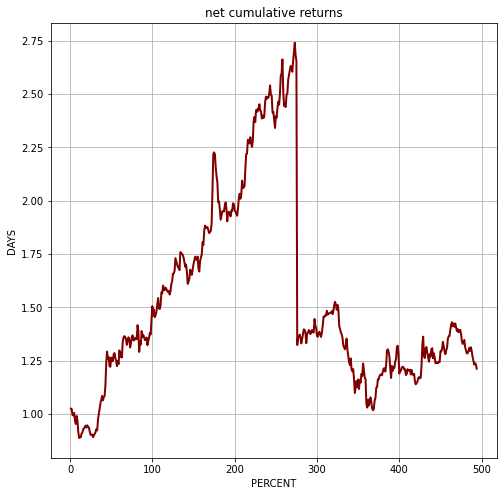

In [ ]:
#plot the net cumulative returns (in %)

import matplotlib.pyplot as plt
a=(df1['Close Price'].pct_change()+1).cumprod()
fig = plt.figure(figsize=(8,8))
plt.xlabel('PERCENT') 
plt.ylabel('DAYS') 
plt.title('net cumulative returns') 
plt.plot(a,linewidth=2,color='maroon')
plt.grid(True)
plt.show()